# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:23:39.760931+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

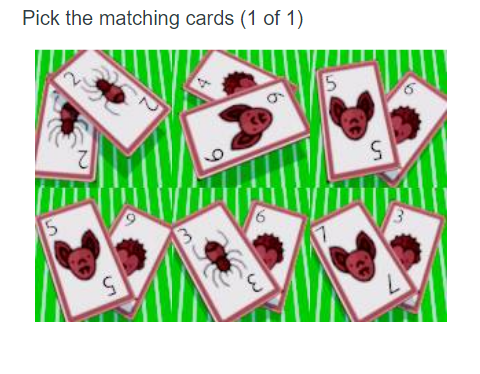

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "A text prompt instructs the user to 'Pick the matching cards (1 of 1)'.")
    describe(1, "A set of cards with various images and numbers is displayed, arranged in a scattered manner.")

    # Step 2: Identify the relationships between frames.
    relate(0, 1, "Frame 0 provides the task instructions, and Frame 1 contains the cards to interact with.")

    # Step 3: Identify the sequential events and the final visual criteria.
    objective("Click on the cards in Frame 1 that match based on the criteria implied by the task instructions in Frame 0.")

## Structure Abstraction

In [ ]:
def stage2(frames):
    # Frame 0: Instruction frame, dependent frame, non-interactable
    frame_0 = frames[0]
    
    # Frame 1: Contains the cards to interact with
    frame_1 = frames[1]
    
    # Split Frame 1 into selectable subframes (each containing a pair of cards)
    subframes = frame_1.split(rows=2, columns=3)
    
    # Mark each subframe as SELECTABLE
    for subframe in subframes:
        subframe.set_frame_as(interactable="SELECTABLE")
    
    # Return the interactable structure
    return {
        "frames": [
            {"frame": frame_0, "interactable": None},  # Frame 0 is non-interactable
            {"frame": frame_1, "interactable": "SELECTABLE"}  # Frame 1 is selectable
        ]
    }

## Solution Composition

In [ ]:
def stage3(frames: list) -> None:
    # Extract images from all selectable frames
    images = [frame.image for frame in frames[1:]]
    
    # Mark the cards in each frame for identification
    marked_images = mark(images, "card")
    
    # Ask the tool to identify matching cards
    matching_cards = ask(marked_images, "Which cards match based on their symbols, numbers, and colors?", answer_type="bool")
    
    # Select the frames with matching cards
    for i, match in enumerate(matching_cards):
        if match:
            select(frames[i + 1])

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: Which cards match based on their symbols, numbers, and colors?
Output a list of (True/False) for each image.
You should follow the format `answer(booleans=[True, False, ...])` to answer the question.

'''

Image 0 Image 1 Image 2 Image 3 Image 4 Image 5
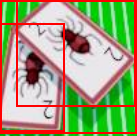
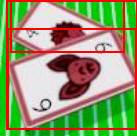
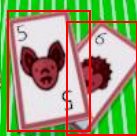
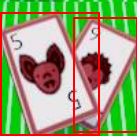
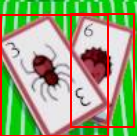
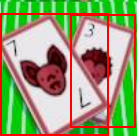

In [ ]:
IMAGES = 6

In [ ]:
RESPONSE = '''
To determine if the cards in each image match based on their symbols, numbers, and colors, we analyze the visible features of the cards in each image.

- **Image 0**: Both cards have the same symbol (spider), the same number (2), and the same color (red). **Match**.
- **Image 1**: The cards have different symbols (bat and hedgehog), the same number (6), and the same color (red). **No Match**.
- **Image 2**: The cards have different symbols (bat and hedgehog), different numbers (5 and 6), but the same color (red). **No Match**.
- **Image 3**: The cards have different symbols (bat and hedgehog), different numbers (5 and 9), but the same color (red). **No Match**.
- **Image 4**: The cards have different symbols (spider and hedgehog), different numbers (3 and 6), but the same color (red). **No Match**.
- **Image 5**: The cards have different symbols (bat and hedgehog), different numbers (7 and 3), but the same color (red). **No Match**.

### Final Output:
```python
answer(booleans=[True, False, False, False, False, False])
```
'''
TIME = 5.573100421577692
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 1864
PROMPT_TOKENS = 1578
COMPLETION_TOKENS = 286

---